<a href="https://colab.research.google.com/github/Yeonsu-Hong/Aiffel_Daegu_AI_project/blob/master/220224_exp15_OCR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/aiffel/ocr_python

In [4]:
!pip install keras-ocr

     |████████████████████████████████| 41 kB 387 kB/s 
     |████████████████████████████████| 9.5 MB 13.6 MB/s 
     |████████████████████████████████| 603 kB 59.8 MB/s 
     |████████████████████████████████| 895 kB 81.5 MB/s 
     |████████████████████████████████| 50 kB 9.0 MB/s 


In [5]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 12.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
!pip install pytesseract

     |████████████████████████████████| 4.3 MB 15.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
# 라이브러리 임포트
import tesseract-ocr
import matplotlib.pyplot as plt
import keras_ocr

SyntaxError: ignored

In [7]:
import os
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
# print(pytesseract.__version__)

0.0.0


**Step1. 검증용 데이터셋 준비**


In [8]:
pipeline = keras_ocr.pipeline.Pipeline() # keras-ocr이 detector와 recognizer를 위한 모델을 자동으로 다운로드 받게 된다.



Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [9]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_path = [
  '/root/aiffel/ocr_python/1.png',
  '/root/aiffel/ocr_python/2.png',
  '/root/aiffel/ocr_python/3.png',
  '/root/aiffel/ocr_python/4.png',
  '/root/aiffel/ocr_python/5.png',
  '/root/aiffel/ocr_python/6.png'
]

images = [ keras_ocr.tools.read(url) for url in image_path]
prediction_groups = [pipeline.recognize([url]) for url in image_path]

**Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)**

**KERAS-OCR**

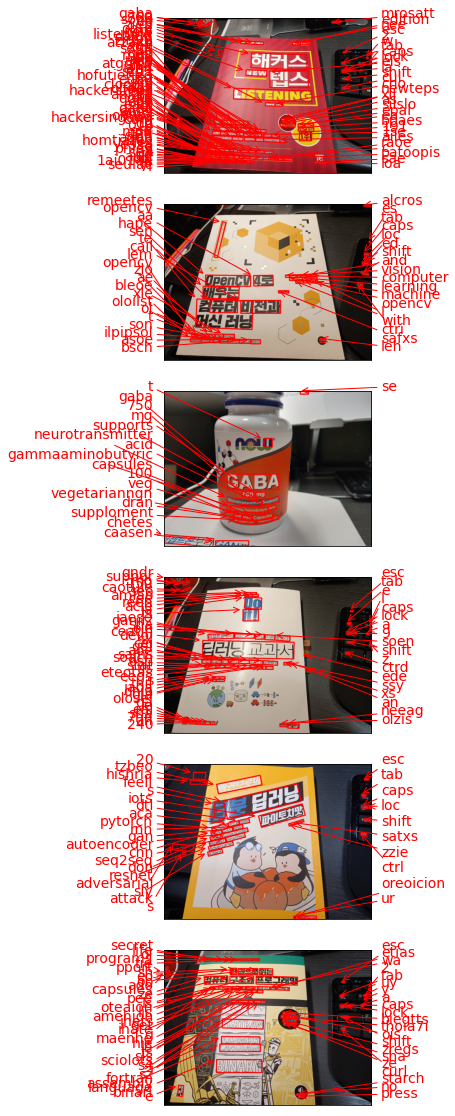

In [10]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

제법 높은 정확도로 영어는 인식을 하고 있다. 소름돋는 점은 옆에서 의도하지 않게 찍힌 키보드의 자판도 인식하여 output으로 내고 있다.

**Tesseract**

In [14]:
from pytesseract import Output
from PIL import Image

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/1.png'
# img_file_path = work_dir + '/2.png' 
# img_file_path = work_dir + '/3.png' 
# img_file_path = work_dir + '/4.png' 
# img_file_path = work_dir + '/5.png' 
# img_file_path = work_dir + '/6.png'    #테스트용 이미지 경로

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/root/aiffel/ocr_python/0000.png
/root/aiffel/ocr_python/0001.png
/root/aiffel/ocr_python/0002.png
/root/aiffel/ocr_python/0003.png
/root/aiffel/ocr_python/0004.png
/root/aiffel/ocr_python/0005.png
/root/aiffel/ocr_python/0006.png
/root/aiffel/ocr_python/0007.png
/root/aiffel/ocr_python/0008.png
/root/aiffel/ocr_python/0009.png
/root/aiffel/ocr_python/0010.png
/root/aiffel/ocr_python/0011.png
/root/aiffel/ocr_python/0012.png
/root/aiffel/ocr_python/0013.png
/root/aiffel/ocr_python/0014.png
/root/aiffel/ocr_python/0015.png
/root/aiffel/ocr_python/0016.png
/root/aiffel/ocr_python/0017.png
/root/aiffel/ocr_python/0018.png
/root/aiffel/ocr_python/0019.png
/root/aiffel/ocr_python/0020.png
/root/aiffel/ocr_python/0021.png
/root/aiffel/ocr_python/0022.png
/root/aiffel/ocr_python/0023.png
/root/aiffel/ocr_python/0024.png
/root/aiffel/ocr_python/0025.png
/root/aiffel/ocr_python/0026.png
/root/aiffel/ocr_python/0027.png
/root/aiffel/ocr_python/0028.png
/root/aiffel/ocr_python/0029.png
/root/aiff

In [19]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력.
recognize_images(cropped_image_path_list)

On Ft A Es

“ Hacke

BT aha)

A

On FY

nea

yi

A 2tZ

~<a S

i la

Ado ATO Rod Pale)

xa

- BOMAZ

Foca Lele wt — Saw Fl

SOTA O}O® Crojor7zp=

Kyrs


geet! Pes ed eT =

Ye

he eee

= he EN Ld

SS eh

Ua Hackers

Ingang.com

eRe = ey

SU Le eee ee ted

AIS 9!

Se

ee arab PPA Cs

Sole be tiene ket

Cai SR) |


hy AE

ao

>}


Y.

: — =

Done


In [16]:
!sudo apt install tesseract-ocr-kor # 한국어 출력으로 바꾸기 위해 패키지 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,050 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-kor all 4.00~git24-0e00fe6-1.2 [1,050 kB]
Fetched 1,050 kB in 0s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling b

In [17]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력.
recognize_images(cropped_image_path_list)

1 02 6스쿠주

스 136

오피스 아인 7

…

6

-

ㅅ

으으 즐

1 .-…205렴

가나 이시 으시0노

2회분 제공(교재 1회분 + 온라인

더크

고이

산시이노가고운드그물 (크룬

아이어 토도 그 애비이 그

디토


구기 모이게 레아,

디올 노

님스 문제 ㆍ무

= 을 으드드시 [이

더

가고겨오드1어버이오기

1119321709.00717

다스오케니새이 스후기,

2전모의고사ㆍ받아쓰기&쉐도잉

노오

프로그램

오구 가(그

수고 사느도이 도 은우

[22 를 ㅣ


베스트

보2

의


“~

: 촉

Done


In [25]:

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# img_file_path = work_dir + '/1.png'
img_file_path = work_dir + '/2.png' 
# img_file_path = work_dir + '/3.png' 
# img_file_path = work_dir + '/4.png' 
# img_file_path = work_dir + '/5.png' 
# img_file_path = work_dir + '/6.png'    #테스트용 이미지 경로

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/root/aiffel/ocr_python/0000.png
/root/aiffel/ocr_python/0001.png
/root/aiffel/ocr_python/0002.png
/root/aiffel/ocr_python/0003.png
/root/aiffel/ocr_python/0004.png
/root/aiffel/ocr_python/0005.png
/root/aiffel/ocr_python/0006.png
/root/aiffel/ocr_python/0007.png
/root/aiffel/ocr_python/0008.png
/root/aiffel/ocr_python/0009.png
/root/aiffel/ocr_python/0010.png
/root/aiffel/ocr_python/0011.png
/root/aiffel/ocr_python/0012.png
/root/aiffel/ocr_python/0013.png
/root/aiffel/ocr_python/0014.png
/root/aiffel/ocr_python/0015.png
/root/aiffel/ocr_python/0016.png
/root/aiffel/ocr_python/0017.png


In [26]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력.
recognize_images(cropped_image_path_list)


0

/

62

0

~ 으

보노

8)

7 을

다

기

2 대

 시

…

0

내

거죽


Done


In [27]:

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# img_file_path = work_dir + '/1.png'
# img_file_path = work_dir + '/2.png' 
img_file_path = work_dir + '/3.png'  # 영어로 된 약병
# img_file_path = work_dir + '/4.png' 
# img_file_path = work_dir + '/5.png' 
# img_file_path = work_dir + '/6.png'    #테스트용 이미지 경로

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/root/aiffel/ocr_python/0000.png
/root/aiffel/ocr_python/0001.png
/root/aiffel/ocr_python/0002.png
/root/aiffel/ocr_python/0003.png
/root/aiffel/ocr_python/0004.png
/root/aiffel/ocr_python/0005.png
/root/aiffel/ocr_python/0006.png
/root/aiffel/ocr_python/0007.png
/root/aiffel/ocr_python/0008.png
/root/aiffel/ocr_python/0009.png
/root/aiffel/ocr_python/0010.png
/root/aiffel/ocr_python/0011.png
/root/aiffel/ocr_python/0012.png
/root/aiffel/ocr_python/0013.png
/root/aiffel/ocr_python/0014.png
/root/aiffel/ocr_python/0015.png
/root/aiffel/ocr_python/0016.png
/root/aiffel/ocr_python/0017.png
/root/aiffel/ocr_python/0018.png
/root/aiffel/ocr_python/0019.png
/root/aiffel/ocr_python/0020.png
/root/aiffel/ocr_python/0021.png


In [28]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력.
recognize_images(cropped_image_path_list)

j ms a es

TA

N

FA

C=

aN

J

a

ys)

f<}

J

pai)

‘.

~

17

AG L—



Li,

C = fA

A

Seas

Done


인식율이 너무 좋지 않다. 검색을 해보니 다소 전처리가 필요한듯 하여 open cv를 활용하여 다시 해보고자 한다.


In [38]:
import cv2
from google.colab.patches import cv2_imshow

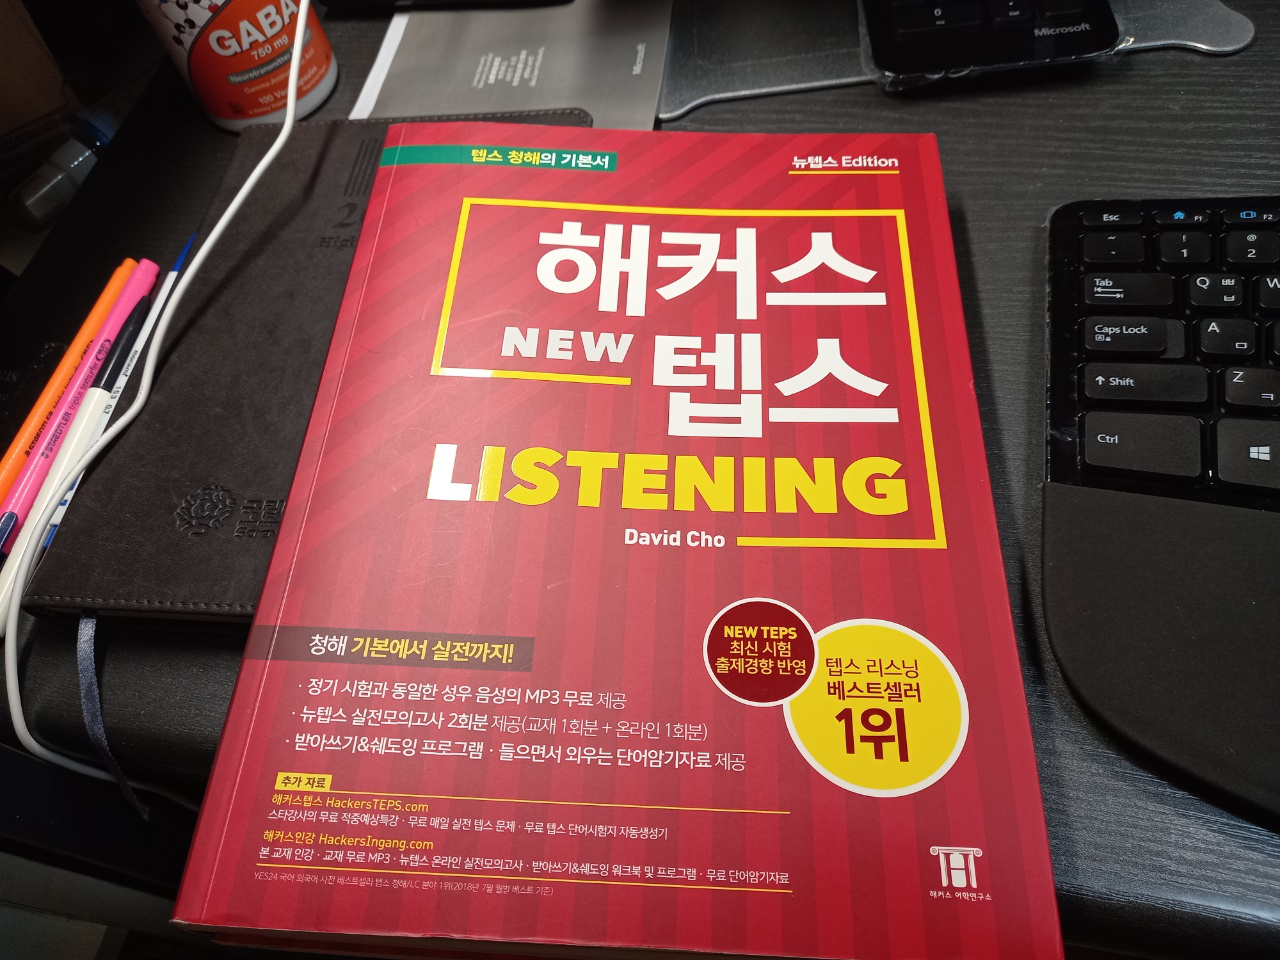

PermissionError: ignored

In [48]:
pytesseract.pytesseract.tesseract_cmd = r'/root/aiffel/ocr_python/1.png' 
config = ('-l kor+eng --oem 3 --psm 7')
img = cv2.imread('/root/aiffel/ocr_python/1.png')
cv2_imshow(img) # 이미지 띄움



print(pytesseract.image_to_string(img, config=config))

**Step3. 테스트 결과 정리**

**KERAS-OCR**

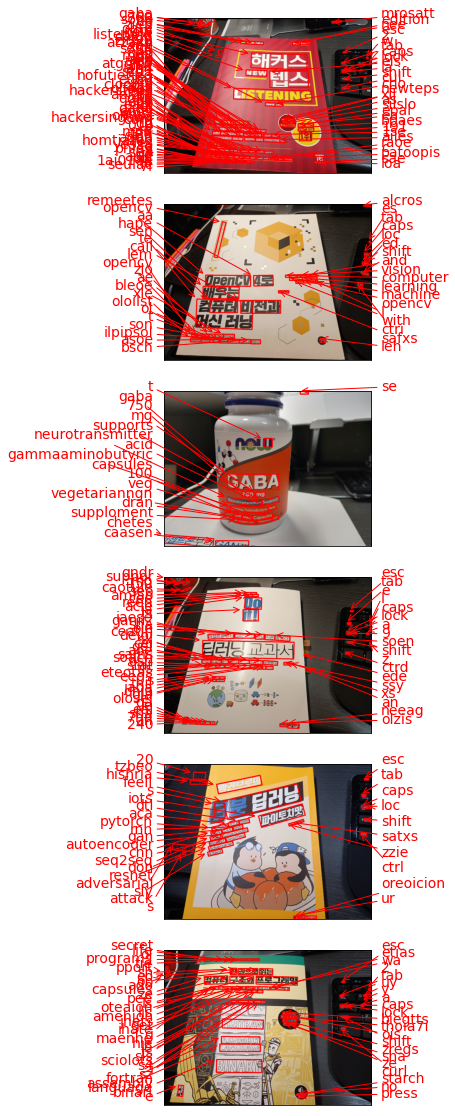

**Step4. 결과 분석과 결론 제시**
